# Review Classification - Home theatre

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Home theatre Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Brilliant,in love with this little beast..sound is cryst...,Home theatre
1,1,5.0,Simply awesome,"I am very happy with Boat Partypal 60, 20 watt...",Home theatre
2,2,5.0,Wonderful,Its sound quality was good but to heavy it is ...,Home theatre
3,3,NaN,NaN,NaN,Home theatre
4,4,NaN,NaN,NaN,Home theatre


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Brilliant,in love with this little beast..sound is cryst...,Home theatre
1,5.0,Simply awesome,"I am very happy with Boat Partypal 60, 20 watt...",Home theatre
2,5.0,Wonderful,Its sound quality was good but to heavy it is ...,Home theatre
3,NaN,NaN,NaN,Home theatre
4,NaN,NaN,NaN,Home theatre


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(13310, 4)

#### Observations
* The dataset has 13310 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     306
Heading    299
Review     299
Product      0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(13004, 4)

#### Observations:
* There are 13004 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    7117
4.0    2625
1.0    1652
3.0    1114
2.0     496
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating        5
Heading     138
Review     7832
Product       1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(7832, 4)
Rating        5
Heading     134
Review     7832
Product       1
dtype: int64


#### Observations:
* We have 7832 unique reviews for laptops
* There are only 134 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Brilliant,in love with this little beast..sound is cryst...,Home theatre,510
1,5.0,Simply awesome,"I am very happy with Boat Partypal 60, 20 watt...",Home theatre,510
2,5.0,Wonderful,Its sound quality was good but to heavy it is ...,Home theatre,190
13,4.0,Delightful,ordered it after doing extensive research. mor...,Home theatre,508
14,5.0,Wonderful,Superb excellent should buy worth for this pri...,Home theatre,134


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Worth every penny,Dear team members\n\n\nIn music playing speake...,Home theatre,195
1,5.0,Perfect product!,Awesome product.. amazing sound. Love it,Home theatre,40
2,5.0,Worth every penny,Bluetooth home theatre\nVery good product,Home theatre,40
3,5.0,Terrific,Best bass,Home theatre,9
4,5.0,Excellent,My best home theater👌👌👌👌👌,Home theatre,25


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(7832, 5)

#### Observtions:
* The dataset has 7832 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    4023
4.0    1510
1.0    1233
3.0     714
2.0     352
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,5.0,Worth every penny,Dear team members\n\n\nIn music playing speake...,Home theatre,195,0,0,0,0,1
1,5.0,Perfect product!,Awesome product.. amazing sound. Love it,Home theatre,40,0,0,0,0,1
2,5.0,Worth every penny,Bluetooth home theatre\nVery good product,Home theatre,40,0,0,0,0,1
3,5.0,Terrific,Best bass,Home theatre,9,0,0,0,0,1
4,5.0,Excellent,My best home theater👌👌👌👌👌,Home theatre,25,0,0,0,0,1
5,5.0,Classy product,Amzing really ....,Home theatre,18,0,0,0,0,1
6,5.0,Classy product,very high quality sound speakers,Home theatre,32,0,0,0,0,1
7,5.0,Wonderful,Good for this price.,Home theatre,20,0,0,0,0,1
8,5.0,Classy product,"Excellent Speakers, happy with the sound system.",Home theatre,48,0,0,0,0,1
9,5.0,Mind-blowing purchase,I'm very happy thank u Flipkart,Home theatre,31,0,0,0,0,1


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000
mean,66.836568,0.157431,0.044944,0.091164,0.192799,0.513662
std,85.560384,0.364230,0.207194,0.287861,0.394522,0.499845
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    3.018592
1 Star                 1.881539
2 Star                 4.393683
3 Star                 2.841230
4 Star                 1.557733
5 Star                -0.054678
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 66.8


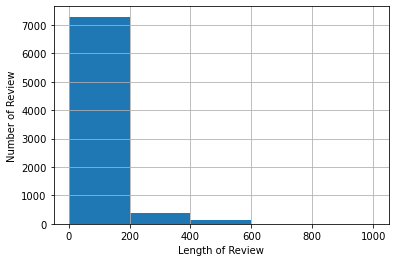

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 66.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

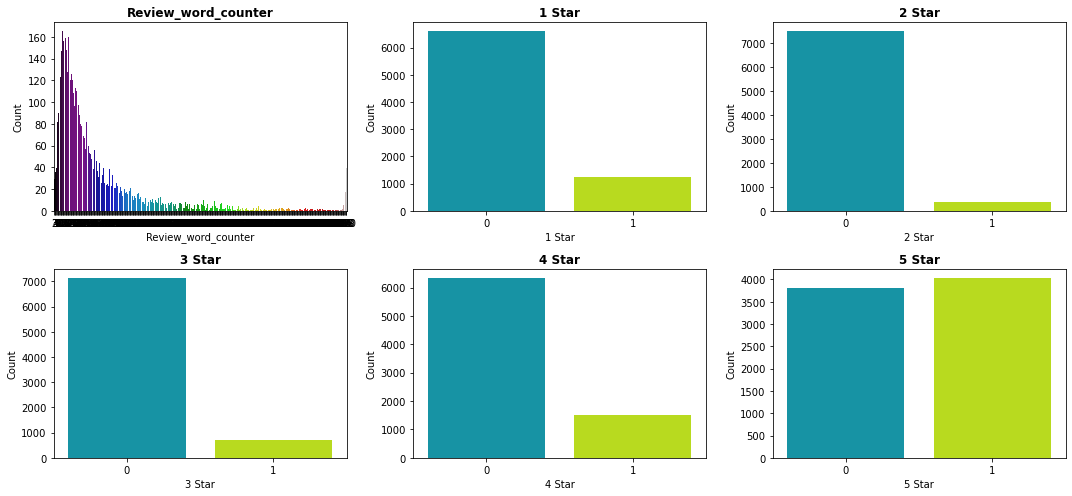

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * Around 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


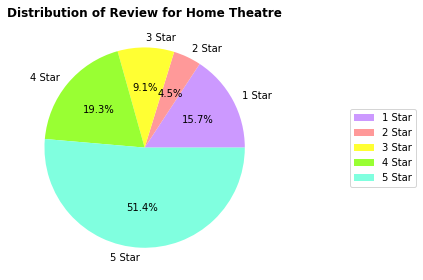

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Home Theatre",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 51.4%, followed by 4 star with 19.3%.
* 2 Star rating has least share with 4.5%

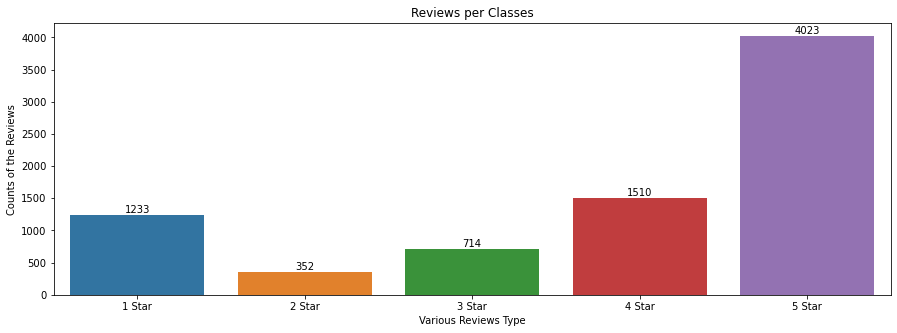

In [33]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 4023 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 1510
* 2 Star ratings have the least count of only 352.

##  Data Pre-Processing

In [34]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simply awesome,i purchased it 2 weeks ago super up... all are...,Home theatre,226,0,0,0,0,1
1,awesome product,"cost worthy product, connectivity is very good...",Home theatre,113,0,0,0,0,1
2,wonderful,good product\nbest in this price.,Home theatre,32,0,0,0,0,1
3,terrific,"value for money,ek no bass and sound quality i...",Home theatre,69,0,0,0,0,1
4,wonderful,best products good,Home theatre,18,0,0,0,0,1


In [35]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simply awesome,i purchased it 2 weeks ago super up... all are...,Home theatre,226,0,0,0,0,1
1,awesome product,"cost worthy product, connectivity is very good...",Home theatre,113,0,0,0,0,1
2,wonderful,good product\nbest in this price.,Home theatre,32,0,0,0,0,1
3,terrific,"value for money,ek no bass and sound quality i...",Home theatre,69,0,0,0,0,1
4,wonderful,best products good,Home theatre,18,0,0,0,0,1


In [36]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simply awesome,i purchased it 2 weeks ago super up all are...,Home theatre,226,0,0,0,0,1
1,awesome product,cost worthy product connectivity is very good...,Home theatre,113,0,0,0,0,1
2,wonderful,good product best in this price,Home theatre,32,0,0,0,0,1
3,terrific,value for money ek no bass and sound quality i...,Home theatre,69,0,0,0,0,1
4,wonderful,best products good,Home theatre,18,0,0,0,0,1


In [37]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simply awesome,i purchased it weeks ago super up all are ex...,Home theatre,226,0,0,0,0,1
1,awesome product,cost worthy product connectivity is very good ...,Home theatre,113,0,0,0,0,1
2,wonderful,good product best in this price,Home theatre,32,0,0,0,0,1
3,terrific,value for money ek no bass and sound quality i...,Home theatre,69,0,0,0,0,1
4,wonderful,best products good,Home theatre,18,0,0,0,0,1


In [38]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [39]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simply awesome,purchased weeks ago super excellent bas...,Home theatre,226,0,0,0,0,1
1,awesome product,cost worthy product connectivity good usb ca...,Home theatre,113,0,0,0,0,1
2,wonderful,good product best price,Home theatre,32,0,0,0,0,1
3,terrific,value money ek bass sound quality clear l...,Home theatre,69,0,0,0,0,1
4,wonderful,best products good,Home theatre,18,0,0,0,0,1


In [40]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simpli awesom,purchas week ago super excel bass volum connec...,Home theatre,226,0,0,0,0,1
1,awesom product,cost worthi product connect good usb card slot...,Home theatre,113,0,0,0,0,1
2,wonder,good product best price,Home theatre,32,0,0,0,0,1
3,terrif,valu money ek bass sound qualiti clear love it,Home theatre,69,0,0,0,0,1
4,wonder,best product good,Home theatre,18,0,0,0,0,1


In [41]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,simpli awesom,purchas week ago super excel bass volum connec...,Home theatre,226,0,0,0,0,1
1,awesom product,cost worthi product connect good usb card slot...,Home theatre,113,0,0,0,0,1
2,wonder,good product best price,Home theatre,32,0,0,0,0,1
3,terrif,valu money ek bass sound qualiti clear love it,Home theatre,69,0,0,0,0,1
4,wonder,best product good,Home theatre,18,0,0,0,0,1


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [42]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(126, 9)

In [43]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [44]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,excel home theatr,excel qualiti term effect qualiti sound output...,Home theatre,510,0,0,0,1,0
1,awesom,beyond expect terrif sound qualiti ii price ba...,Home theatre,505,0,0,0,0,1
2,nice product,sound good velu money,Home theatre,29,0,0,0,1,0
3,zebron bt wireless home audio speaker,awesom enjoy sound qualiti profit home theater...,Home theatre,167,0,0,0,0,1
4,f alway good sound system especi one,awesom f bass good especi surround sound reall...,Home theatre,258,0,0,0,0,1


In [45]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [46]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



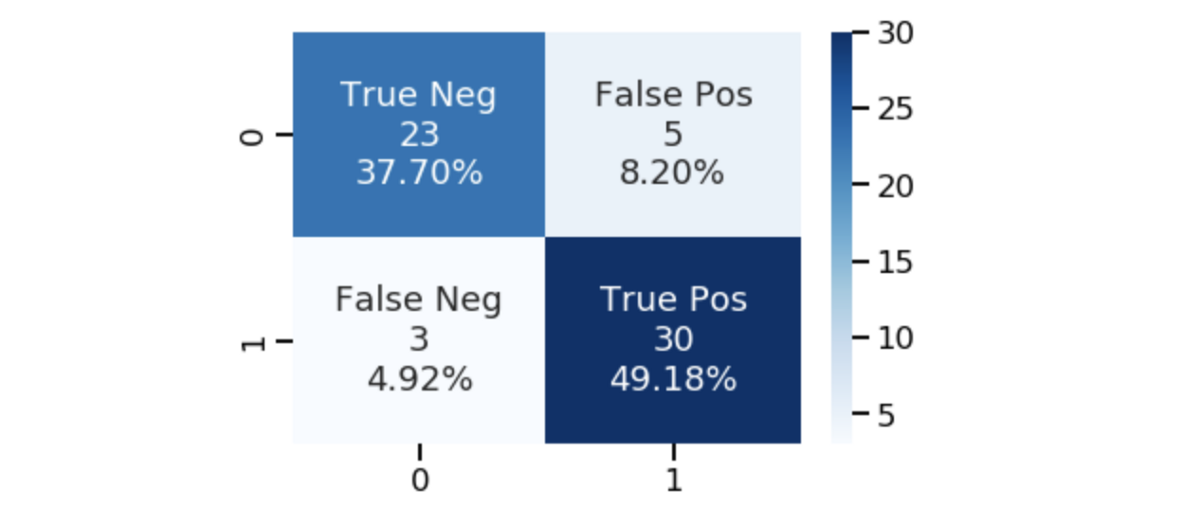

In [48]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [49]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  18.75
Cross validation score= 23.015873015873016


log loss= 13.749993463914816
hamming loss= 0.5


f1 score= 0.3333333333333333
average precision score= 0.22727272727272727
AUC ROC score= 0.5045562770562771


label ranking average precision score= 0.3765624999999999
coverage area= 3.90625




In [50]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[16,  8],
        [ 3,  5]],

       [[16, 14],
        [ 2,  0]],

       [[13, 11],
        [ 3,  5]],

       [[ 8, 20],
        [ 1,  3]],

       [[ 7, 15],
        [ 3,  7]]])

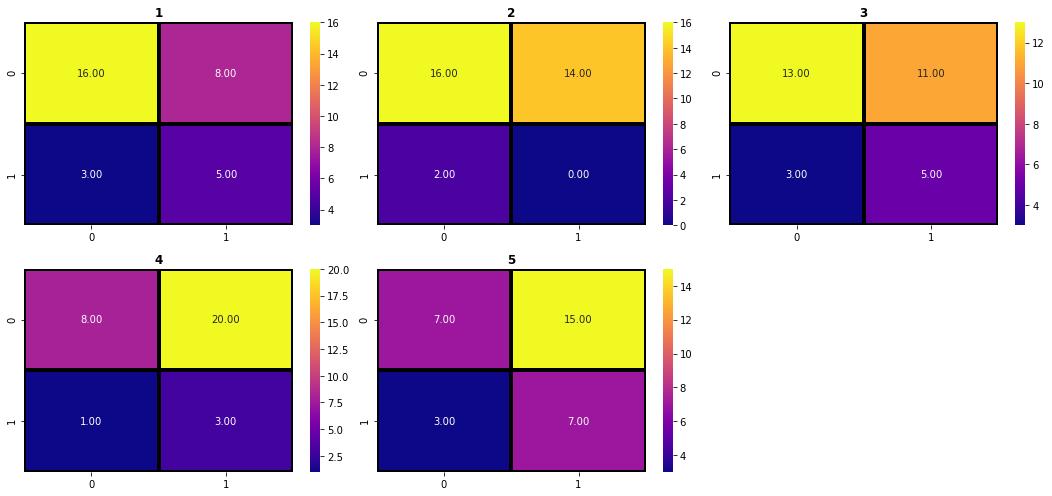

In [51]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [52]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  21.875
Cross validation score= 30.952380952380953


log loss= 26.983419058523978
hamming loss= 0.3125


AUC ROC score= 0.5053138528138528
f1 score= 0.21875
average precision score= 0.21875


coverage area= 4.125
label ranking average precision score= 0.37499999999999994


In [53]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[22,  2],
        [ 5,  3]],

       [[16, 14],
        [ 2,  0]],

       [[23,  1],
        [ 7,  1]],

       [[22,  6],
        [ 3,  1]],

       [[20,  2],
        [ 8,  2]]])

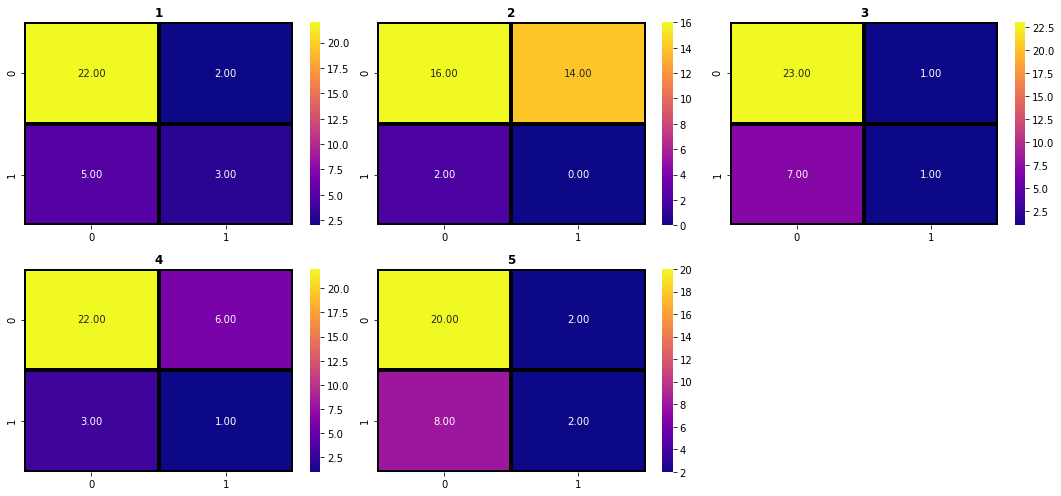

In [54]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [55]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  12.5
Cross validation score= 15.079365079365079


log loss= 5.524425483689413
hamming loss= 0.2


AUC ROC score= 0.5218181818181817
f1 score= 0.2
average precision score= 0.5


coverage area= 4.5
label ranking average precision score= 0.3


In [56]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[24,  0],
        [ 8,  0]],

       [[30,  0],
        [ 2,  0]],

       [[24,  0],
        [ 8,  0]],

       [[28,  0],
        [ 4,  0]],

       [[18,  4],
        [ 6,  4]]])

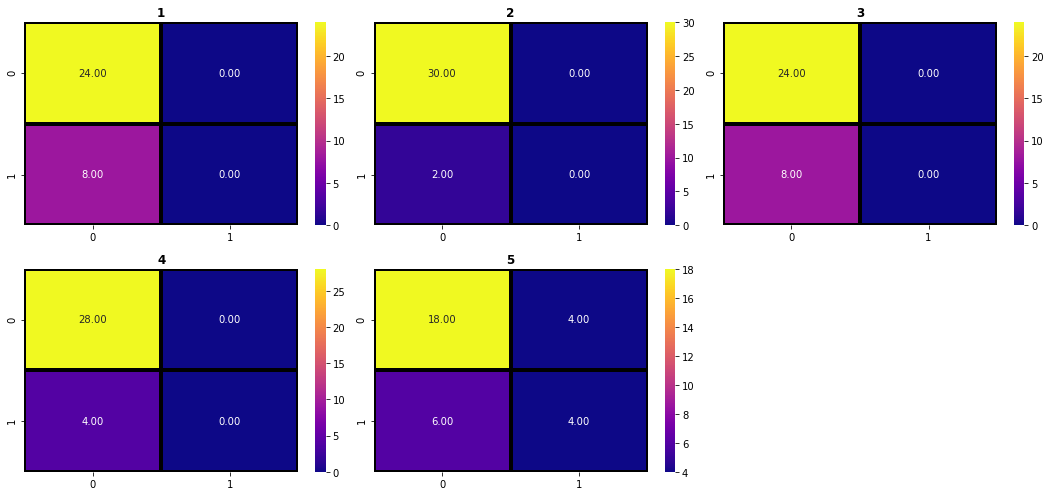

In [57]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [58]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  18.75
Cross validation score= 19.047619047619047


log loss= 15.714253889936217
hamming loss= 0.25


AUC ROC score= 0.5272186147186148
f1 score= 0.23076923076923075
average precision score= 0.3


label ranking average precision score= 0.34999999999999987
coverage area= 4.25


In [59]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[18,  6],
        [ 5,  3]],

       [[29,  1],
        [ 2,  0]],

       [[24,  0],
        [ 8,  0]],

       [[23,  5],
        [ 3,  1]],

       [[20,  2],
        [ 8,  2]]])

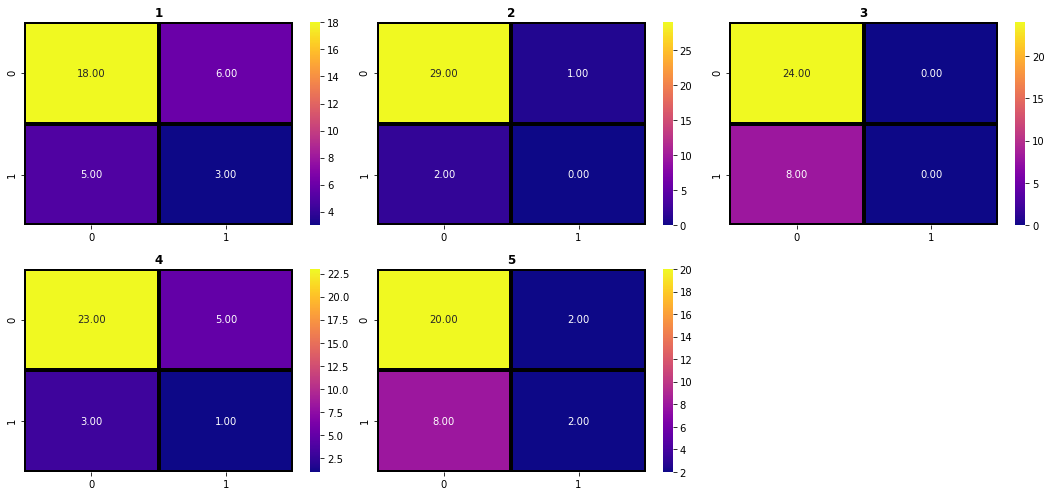

In [60]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [61]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Label powerset,21.875,30.952381,0.3125,26.983419,0.505314,0.218750,0.218750,4.12500,0.375000
1,Binary Relevance,18.750,23.015873,0.5000,13.749993,0.504556,0.333333,0.227273,3.90625,0.376562
2,Adapted algorithm,18.750,19.047619,0.2500,15.714254,0.527219,0.230769,0.300000,4.25000,0.350000
3,Classifier chain,12.500,15.079365,0.2000,5.524425,0.521818,0.200000,0.500000,4.50000,0.300000


#### Conclusion:
* The hamming loss for Label Powerset is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted ALgorithm is maximum which is 0.527
* The AUC ROC Score for Classifier Chain and Adapted Algorithm is almost similar.
* The accuracy score of Label Powerset is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [62]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [63]:
z.shape

(7832,)

In [64]:
y.shape

(7832, 5)

In [65]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [66]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [67]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  8.88661899897855
Cross validation score= 9.997397786063773


log loss= 13.074176015385477
hamming loss= 0.5148110316649642


f1 score= 0.32093775262732416
average precision score= 0.21797218155197656
AUC ROC score= 0.5721506657316465


label ranking average precision score= 0.33275451140619877
coverage area= 3.812053115423902




In [68]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 755,  907],
        [  58,  238]],

       [[1060,  809],
        [  42,   47]],

       [[ 612, 1144],
        [  59,  143]],

       [[ 350, 1228],
        [  65,  315]],

       [[ 782,  185],
        [ 543,  448]]])

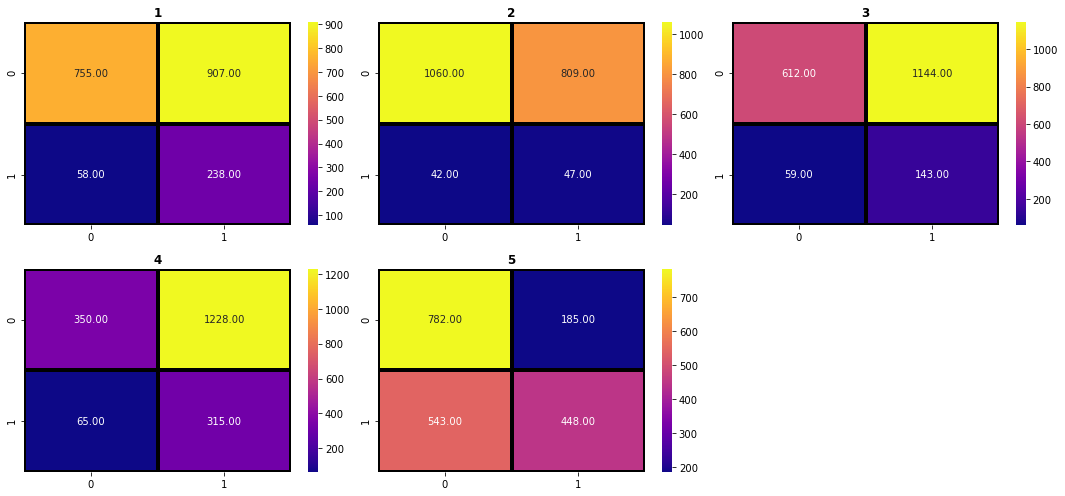

In [69]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [70]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  17.517875383043922
Cross validation score= 17.900962281104647


log loss= 28.48831658722205
hamming loss= 0.3299284984678243


AUC ROC score= 0.5280128150761658
f1 score= 0.1751787538304392
average precision score= 0.1751787538304392


coverage area= 4.299284984678243
label ranking average precision score= 0.3401430030643559


In [71]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[1574,   88],
        [ 231,   65]],

       [[1185,  684],
        [  43,   46]],

       [[1208,  548],
        [ 155,   47]],

       [[1376,  202],
        [ 331,   49]],

       [[ 874,   93],
        [ 855,  136]]])

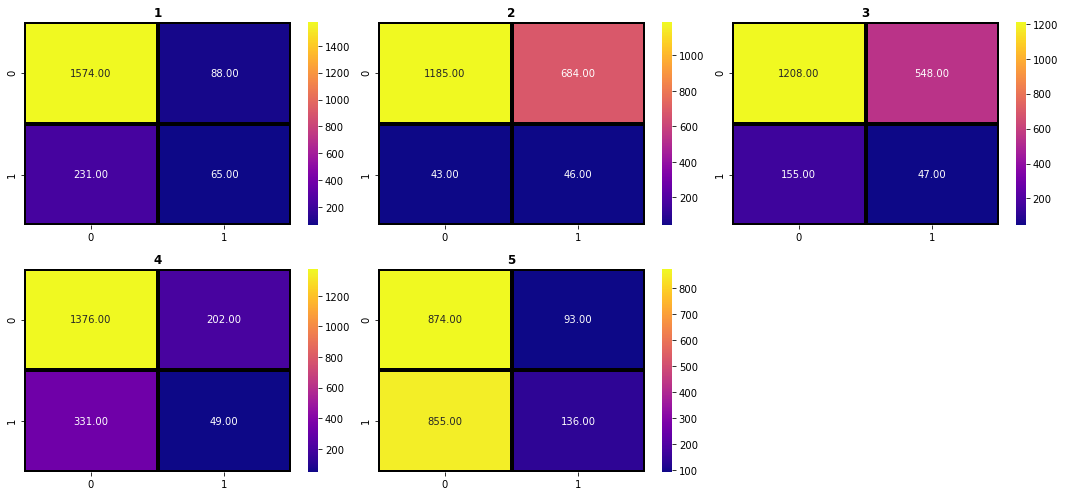

In [72]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [73]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  51.12359550561798
Cross validation score= 51.08513788554466


log loss= 9.632821309490359
hamming loss= 0.15148110316649643


AUC ROC score= 0.5662537570865155
f1 score= 0.5744619799139168
average precision score= 0.6555337262606418


coverage area= 2.955056179775281
label ranking average precision score= 0.6089887640449553


In [74]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[1643,   19],
        [ 220,   76]],

       [[1869,    0],
        [  89,    0]],

       [[1755,    1],
        [ 202,    0]],

       [[1567,   11],
        [ 378,    2]],

       [[ 472,  495],
        [  68,  923]]])

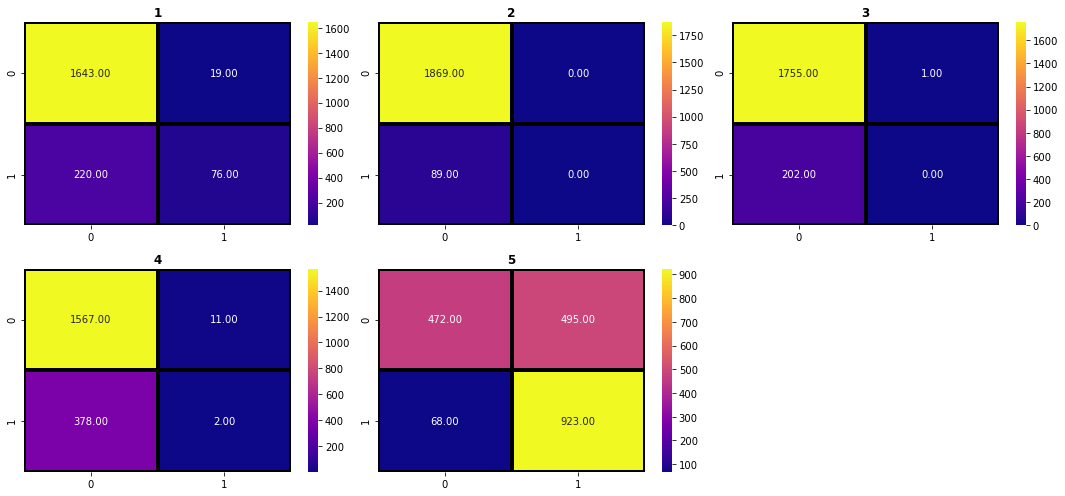

In [75]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [76]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  46.782431052093976
Cross validation score= 48.761346166356795


log loss= 13.928211632786315
hamming loss= 0.18794688457609807


AUC ROC score= 0.5928064023842545
f1 score= 0.5101171458998935
average precision score= 0.5328142380422692


label ranking average precision score= 0.5806945863125749
coverage area= 3.0643513789581207


In [77]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[1442,  220],
        [ 101,  195]],

       [[1850,   19],
        [  89,    0]],

       [[1719,   37],
        [ 187,   15]],

       [[1362,  216],
        [ 318,   62]],

       [[ 619,  348],
        [ 305,  686]]])

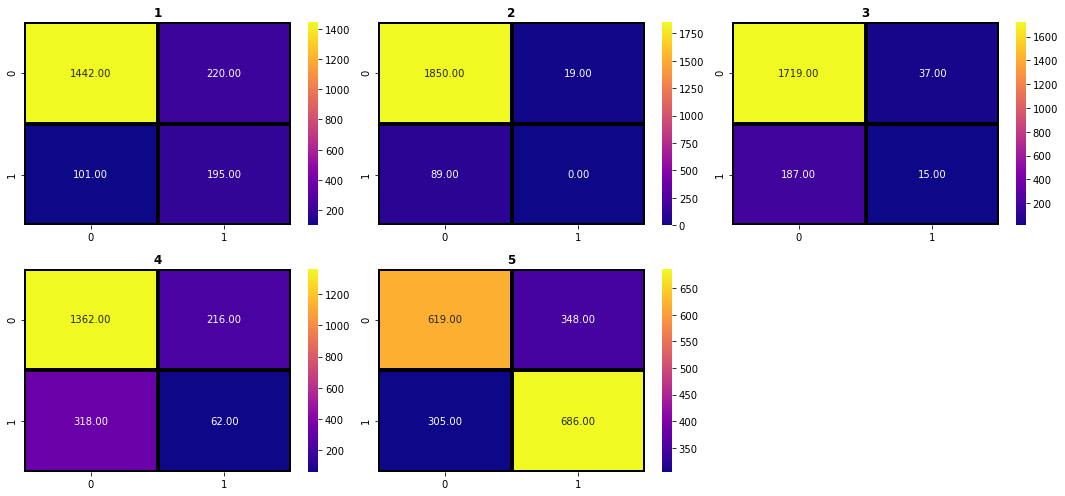

In [78]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [79]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,51.123596,51.085138,0.151481,9.632821,0.566254,0.574462,0.655534,2.955056,0.608989
1,Adapted algorithm,46.782431,48.761346,0.187947,13.928212,0.592806,0.510117,0.532814,3.064351,0.580695
2,Label powerset,17.517875,17.900962,0.329928,28.488317,0.528013,0.175179,0.175179,4.299285,0.340143
3,Binary Relevance,8.886619,9.997398,0.514811,13.074176,0.572151,0.320938,0.217972,3.812053,0.332755


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.56
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [80]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,18.750000,23.015873,0.500000,13.749993,0.504556,0.333333,0.227273,3.906250,0.376562,Heading
1,Classifier chain,12.500000,15.079365,0.200000,5.524425,0.521818,0.200000,0.500000,4.500000,0.300000,Heading
2,Label powerset,21.875000,30.952381,0.312500,26.983419,0.505314,0.218750,0.218750,4.125000,0.375000,Heading
3,Adapted algorithm,18.750000,19.047619,0.250000,15.714254,0.527219,0.230769,0.300000,4.250000,0.350000,Heading
0,Binary Relevance,8.886619,9.997398,0.514811,13.074176,0.572151,0.320938,0.217972,3.812053,0.332755,Review
1,Classifier chain,51.123596,51.085138,0.151481,9.632821,0.566254,0.574462,0.655534,2.955056,0.608989,Review
2,Label powerset,17.517875,17.900962,0.329928,28.488317,0.528013,0.175179,0.175179,4.299285,0.340143,Review
3,Adapted algorithm,46.782431,48.761346,0.187947,13.928212,0.592806,0.510117,0.532814,3.064351,0.580695,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss by Classifier Chain is the least both for heading of reviews and reviews.
* The AUC ROC score by Adapted Algorithm is the least both for heading of reviews and reviews.
* The accuracy score of Label Powerset is best for heading and Classifier Chain for reviews

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))